# 데이터 불러오기

In [465]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np

In [466]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/KDT/본 프로젝트


In [467]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [468]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기'],
      dtype='object')

In [469]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [470]:
# 신촌동만 남김
df_sin = df[df.행정동=='신촌동']

# 신촌동에 중분류 업종 중 '주유', '여행', '기술', '정비/수리' 는 18년도에만 매출이 찍혀있으므로, 제외하도록 하자.
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '주유'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '여행'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '기술'].index)
df_sin = df_sin.drop(df_sin[df_sin.중분류 == '정비/수리'].index).reset_index().drop('index', axis=1)

# df_sin

In [471]:
# 분기별 업종별 매출금액 합치기

df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


# # 소매 카테고리만 남기기
# df_sin_sell_quarter = df_sin_quarter[df_sin_quarter.대분류 == '소매'].reset_index().drop('index', axis=1)


# # 서비스 카테고리만 남기기
# df_sin_service_quarter = df_sin_quarter[df_sin_quarter.대분류 == '서비스'].reset_index().drop('index', axis=1)


# # 외식 카테고리만 남기기
# df_sin_food_quarter = df_sin_quarter[df_sin_quarter.대분류 == '외식'].reset_index().drop('index', axis=1)

# # df_sin_food_quarter

<ipython-input-471-1b79066c5732>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sin_quarter = df_sin.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


# 의약품

In [472]:
# 한식만 남기기
sin_pills = df_sin_quarter[df_sin_quarter.업종명 == '의약품'].reset_index().drop('index', axis=1)
sin_pills

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,소매,의료,의약품,신촌동,14651088733,48,0,1
1,2017-2,소매,의료,의약품,신촌동,14878971337,47,1,2
2,2017-3,소매,의료,의약품,신촌동,15388358152,49,2,0
3,2017-4,소매,의료,의약품,신촌동,14477519030,49,1,1
4,2018-1,소매,의료,의약품,신촌동,15526289999,50,2,1
5,2018-2,소매,의료,의약품,신촌동,15476800329,49,0,1
6,2018-3,소매,의료,의약품,신촌동,15499262877,49,1,1
7,2018-4,소매,의료,의약품,신촌동,16262609350,48,1,2
8,2019-1,소매,의료,의약품,신촌동,19733600581,47,0,1
9,2019-2,소매,의료,의약품,신촌동,20207605848,50,3,0


## 지표 만들기 : 성장성, 시장성, 순점포증감률

In [473]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

sin_pills['성장성'] = sin_pills['분기당_매출_금액'] / sin_pills['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
sin_pills['성장성'][0] = 1

sin_pills

<ipython-input-473-e53e1e5af1bb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_pills['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,소매,의료,의약품,신촌동,14651088733,48,0,1,1.000000
1,2017-2,소매,의료,의약품,신촌동,14878971337,47,1,2,1.015554
2,2017-3,소매,의료,의약품,신촌동,15388358152,49,2,0,1.034235
3,2017-4,소매,의료,의약품,신촌동,14477519030,49,1,1,0.940810
4,2018-1,소매,의료,의약품,신촌동,15526289999,50,2,1,1.072441
5,2018-2,소매,의료,의약품,신촌동,15476800329,49,0,1,0.996813
6,2018-3,소매,의료,의약품,신촌동,15499262877,49,1,1,1.001451
7,2018-4,소매,의료,의약품,신촌동,16262609350,48,1,2,1.049251
8,2019-1,소매,의료,의약품,신촌동,19733600581,47,0,1,1.213434
9,2019-2,소매,의료,의약품,신촌동,20207605848,50,3,0,1.024020


In [474]:
# 개업률, 폐업률, 순점포증감률 추가

sin_pills['개업률'] = (sin_pills['개업점포수'] / sin_pills['총 점포수']) * 100
sin_pills['폐업률'] = (sin_pills['폐업점포수'] / sin_pills['총 점포수']) * 100
sin_pills['순점포증감률'] = ((sin_pills['개업점포수'] - sin_pills['폐업점포수']) / sin_pills['총 점포수']) * 100

# sin_pills

In [475]:
# # 안정성 추가
# # 점포수 변동의 민감도를 판단하기 위해 기초구역 단위별, 선택 업종의 점포수 변화량을 산출하여 안정 정도를 판단
# # 안정성 = 1 - (폐업 점포수 / 신규 점포수).  신규 점포수는 개업 점포수로 한다.

# sin_food_quarter['안정성'] = 1 - (sin_food_quarter['폐업점포수']/sin_food_quarter['개업점포수'])
# # sin_food_quarter

In [476]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_seo = df[df['자치구'] == '서대문구']

# 자치구 분기별 업종별 매출금액 합치기
df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 한식만 남기기
seo_pills = df_seo_quarter[df_seo_quarter['업종명'] == '의약품'].reset_index()

################################################################################################################################################################################################

sin_pills['시장성'] = (sin_pills['분기당_매출_금액'] / sin_pills['총 점포수']) - (seo_pills['분기당_매출_금액'] / seo_pills['총 점포수'])

sin_pills = sin_pills[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
sin_pills

<ipython-input-476-7d92ea18b8b2>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_seo_quarter = df_seo.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()


,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,의약품,14651088733,1.000000,-2.083333,8.776581e+07
1,2017-2,의약품,14878971337,1.015554,-2.127660,8.828899e+07
2,2017-3,의약품,15388358152,1.034235,4.081633,9.772411e+07
3,2017-4,의약품,14477519030,0.940810,0.000000,8.854231e+07
4,2018-1,의약품,15526289999,1.072441,2.000000,9.435408e+07
5,2018-2,의약품,15476800329,0.996813,-2.040816,9.893250e+07
6,2018-3,의약품,15499262877,1.001451,0.000000,1.026495e+08
7,2018-4,의약품,16262609350,1.049251,-2.083333,1.107373e+08
8,2019-1,의약품,19733600581,1.213434,-2.127660,1.934281e+08
9,2019-2,의약품,20207605848,1.024020,6.000000,1.809292e+08


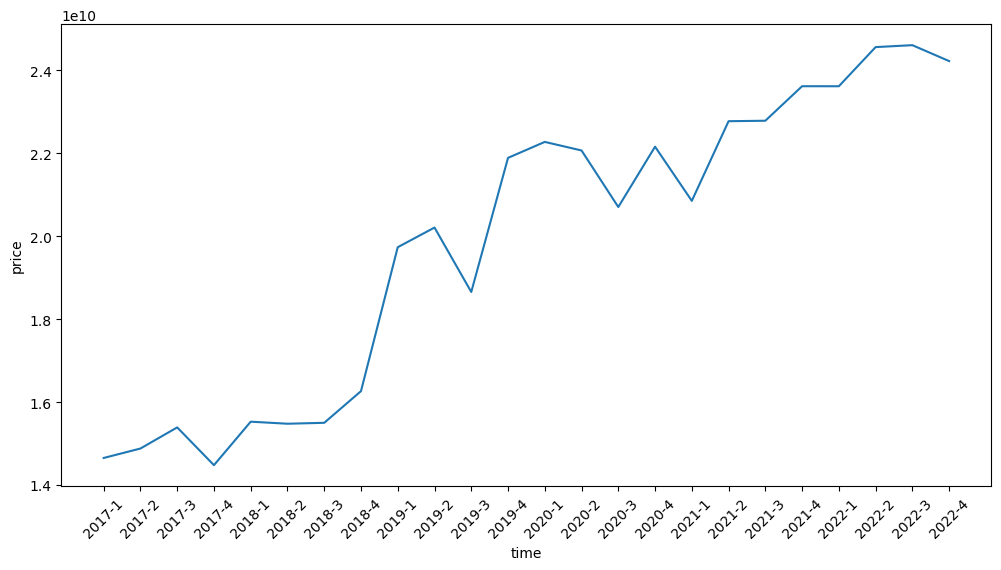

In [477]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(x=sin_pills['분기'], y=sin_pills['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [478]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_pills[['성장성', '시장성', '순점포증감률']]
y = sin_pills.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  8.776581e+07 -2.083333
1   1.015554  8.828899e+07 -2.127660
2   1.034235  9.772411e+07  4.081633
3   0.940810  8.854231e+07  0.000000
4   1.072441  9.435408e+07  2.000000
5   0.996813  9.893250e+07 -2.040816
6   1.001451  1.026495e+08  0.000000
7   1.049251  1.107373e+08 -2.083333
8   1.213434  1.934281e+08 -2.127660
9   1.024020  1.809292e+08  6.000000
10  0.923117  1.324538e+08  3.846154
11  1.173364  1.651199e+08  0.000000
12  1.017588  1.467750e+08  0.000000
13  0.990716  1.141362e+08  3.703704
14  0.938219  1.211135e+08  0.000000
15  1.070265  1.614356e+08 -1.923077
16  0.941047  1.476332e+08  1.886792
17  1.092118  1.527944e+08  3.636364
18  1.000494  1.386036e+08  3.508772
19  1.036539  1.424713e+08 -1.785714
20  0.999961  1.223943e+08  0.000000
21  1.039979  1.649853e+08  0.000000
22  1.001893  1.130446e+08 -1.851852
23  0.984404  1.610437e+08  1.818182
---------------------------------------------------------------------------

In [479]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [480]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [481]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [482]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.27134486 0.23924109 0.03393446]
 [0.2111056  0.69351042 0.4854831 ]]


In [483]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [484]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_68 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_69 (LSTM)              (None, 32)                12416     
                                                                 
 dense_34 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [485]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1512
Epoch 1: val_loss improved from inf to 0.60846, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1512 - val_loss: 0.6085
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1448
Epoch 2: val_loss improved from 0.60846 to 0.59135, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.1448 - val_loss: 0.5914
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1386
Epoch 3: val_loss improved from 0.59135 to 0.57473, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.1386 - val_loss: 0.5747
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1327
Epoch 4: val_loss improved from 0.57473 to 0.55854, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.1327 - val_loss: 0.5585
Epoch 5/100
1/1 [=================

In [486]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 902ms/step
[[0.41806045]
 [0.34580413]
 [0.3702598 ]
 [0.38385507]]


In [487]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.902192,0.418060
2022-2,0.995410,0.345804
2022-3,1.000000,0.370260
2022-4,0.962110,0.383855


In [488]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_pills의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.902192,0.418060,23614824000,1.871159e+10,4.903233e+09
2022-2,0.995410,0.345804,24558928501,1.797979e+10,6.579143e+09
2022-3,1.000000,0.370260,24605410798,1.822747e+10,6.377940e+09
2022-4,0.962110,0.383855,24221669422,1.836516e+10,5.856508e+09


In [489]:
df_test = df_test.reset_index()

### 결과

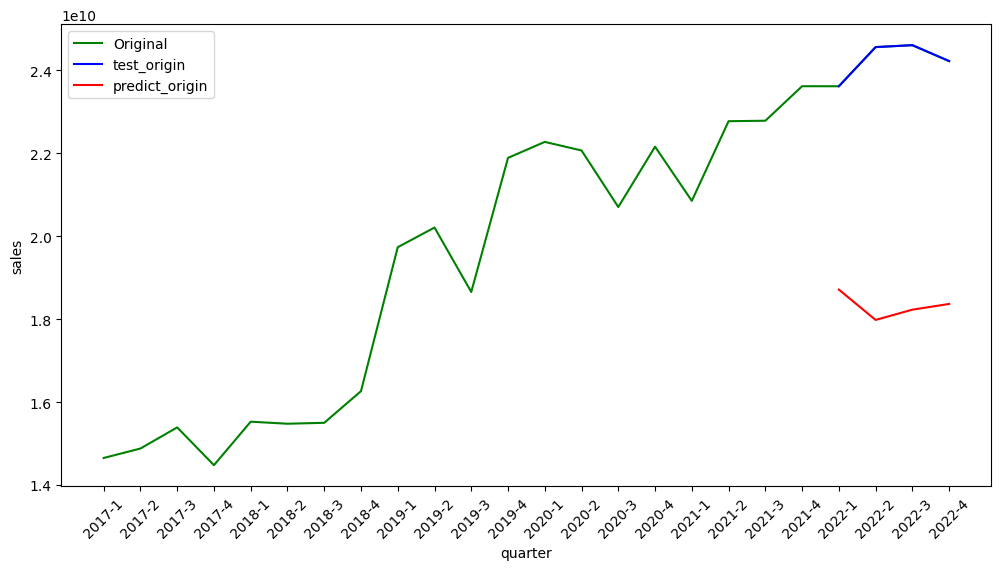

In [490]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [491]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     5.929206e+09
std      7.487070e+08
min      4.903233e+09
25%      5.618189e+09
50%      6.117224e+09
75%      6.428241e+09
max      6.579143e+09
dtype: float64

In [492]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.33147982]]
--------------------------------------------------------------------------------
예측된 매출  : 17834711040.0 


## 23년 1분기 성장성 예측

In [493]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_pills[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_pills.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

      분기당_매출_금액           시장성    순점포증감률
0   14651088733  8.776581e+07 -2.083333
1   14878971337  8.828899e+07 -2.127660
2   15388358152  9.772411e+07  4.081633
3   14477519030  8.854231e+07  0.000000
4   15526289999  9.435408e+07  2.000000
5   15476800329  9.893250e+07 -2.040816
6   15499262877  1.026495e+08  0.000000
7   16262609350  1.107373e+08 -2.083333
8   19733600581  1.934281e+08 -2.127660
9   20207605848  1.809292e+08  6.000000
10  18653976192  1.324538e+08  3.846154
11  21887898588  1.651199e+08  0.000000
12  22272873857  1.467750e+08  0.000000
13  22066091556  1.141362e+08  3.703704
14  20702819805  1.211135e+08  0.000000
15  22157495930  1.614356e+08 -1.923077
16  20851241793  1.476332e+08  1.886792
17  22772011569  1.527944e+08  3.636364
18  22783257833  1.386036e+08  3.508772
19  23615743570  1.424713e+08 -1.785714
20  23614824000  1.223943e+08  0.000000
21  24558928501  1.649853e+08  0.000000
22  24605410798  1.130446e+08 -1.851852
23  24221669422  1.610437e+08  1.818182


In [494]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [495]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [496]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[1.         0.23924109 0.03393446]
 [0.96211044 0.69351042 0.4854831 ]]


In [497]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [498]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_70 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_71 (LSTM)              (None, 32)                12416     
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [499]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2736
Epoch 1: val_loss improved from inf to 0.13455, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2736 - val_loss: 0.1346
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2658
Epoch 2: val_loss improved from 0.13455 to 0.12684, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.2658 - val_loss: 0.1268
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2583
Epoch 3: val_loss improved from 0.12684 to 0.11950, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.2583 - val_loss: 0.1195
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2510
Epoch 4: val_loss improved from 0.11950 to 0.11249, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2510 - val_loss: 0.1125
Epoch 5/100
1/1 [=================

In [500]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.32502013]
 [0.26180017]
 [0.2914511 ]
 [0.28735632]]


In [501]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.264691,0.325020
2022-2,0.402535,0.261800
2022-3,0.271345,0.291451
2022-4,0.211106,0.287356


In [502]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 3].values       # 성장성이 sin_pills의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.264691,0.325020,0.999961,1.017476,-0.017515
2022-2,0.402535,0.261800,1.039979,0.999122,0.040858
2022-3,0.271345,0.291451,1.001893,1.007730,-0.005837
2022-4,0.211106,0.287356,0.984404,1.006541,-0.022137


### 결과

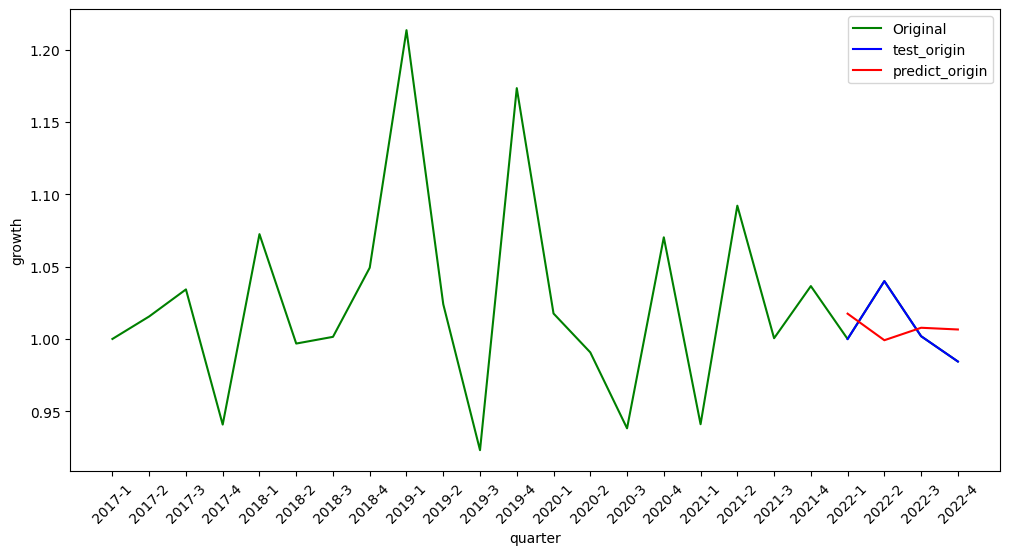

In [503]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [504]:
## error의 요약 통계량
error.describe()

count    4.000000
mean    -0.001158
std      0.028838
min     -0.022137
25%     -0.018670
50%     -0.011676
75%      0.005837
max      0.040858
dtype: float64

In [505]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 24ms/step
[[0.27785346]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0037822723388672 


## 23년 1분기 시장성 예측

In [506]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_pills[['성장성', '분기당_매출_금액', '순점포증감률']]
y = sin_pills.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액    순점포증감률
0   1.000000  14651088733 -2.083333
1   1.015554  14878971337 -2.127660
2   1.034235  15388358152  4.081633
3   0.940810  14477519030  0.000000
4   1.072441  15526289999  2.000000
5   0.996813  15476800329 -2.040816
6   1.001451  15499262877  0.000000
7   1.049251  16262609350 -2.083333
8   1.213434  19733600581 -2.127660
9   1.024020  20207605848  6.000000
10  0.923117  18653976192  3.846154
11  1.173364  21887898588  0.000000
12  1.017588  22272873857  0.000000
13  0.990716  22066091556  3.703704
14  0.938219  20702819805  0.000000
15  1.070265  22157495930 -1.923077
16  0.941047  20851241793  1.886792
17  1.092118  22772011569  3.636364
18  1.000494  22783257833  3.508772
19  1.036539  23615743570 -1.785714
20  0.999961  23614824000  0.000000
21  1.039979  24558928501  0.000000
22  1.001893  24605410798 -1.851852
23  0.984404  24221669422  1.818182
--------------------------------------------------------------------------------
             시장성
0 

In [507]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [508]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [509]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.27134486 1.         0.03393446]
 [0.2111056  0.96211044 0.4854831 ]]


In [510]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [511]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_73 (LSTM)              (None, 32)                12416     
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [512]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2717
Epoch 1: val_loss improved from inf to 0.29347, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2717 - val_loss: 0.2935
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2643
Epoch 2: val_loss improved from 0.29347 to 0.28151, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2643 - val_loss: 0.2815
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2571
Epoch 3: val_loss improved from 0.28151 to 0.27000, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2571 - val_loss: 0.2700
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2502
Epoch 4: val_loss improved from 0.27000 to 0.25887, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.2502 - val_loss: 0.2589
Epoch 5/100
1/1 [=================

In [513]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.51479137]
 [0.45293733]
 [0.47958064]
 [0.48437643]]


In [514]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.327728,0.514791
2022-2,0.730814,0.452937
2022-3,0.239241,0.479581
2022-4,0.693510,0.484376


In [515]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 5].values       # 시장성이 sin_pills의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.327728,0.514791,1.223943e+08,142159824.0,-1.976553e+07
2022-2,0.730814,0.452937,1.649853e+08,135624176.0,2.936112e+07
2022-3,0.239241,0.479581,1.130446e+08,138439376.0,-2.539482e+07
2022-4,0.693510,0.484376,1.610437e+08,138946112.0,2.209757e+07


### 결과

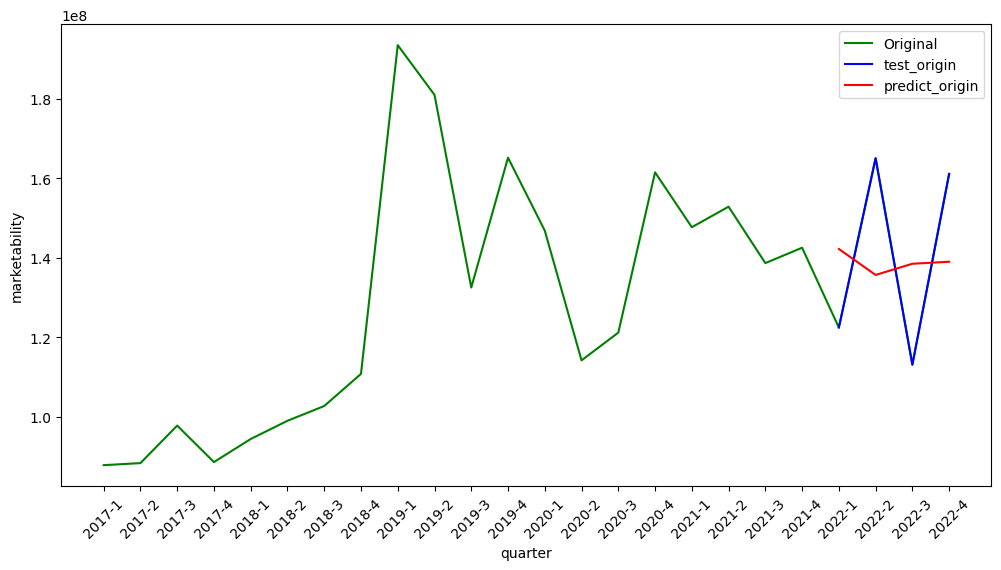

In [516]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [517]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.574583e+06
std      2.814269e+07
min     -2.539482e+07
25%     -2.117285e+07
50%      1.166017e+06
75%      2.391345e+07
max      2.936112e+07
dtype: float64

In [518]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 34ms/step
[[0.45457557]]
--------------------------------------------------------------------------------
예측된 시장성  : 135797280.0 


## 23년 1분기 순점포증감률 예측

In [519]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 시장성 선정. => 안정성 제외!

### X / y 데이터 생성
X = sin_pills[['성장성', '분기당_매출_금액', '시장성']]
y = sin_pills.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액           시장성
0   1.000000  14651088733  8.776581e+07
1   1.015554  14878971337  8.828899e+07
2   1.034235  15388358152  9.772411e+07
3   0.940810  14477519030  8.854231e+07
4   1.072441  15526289999  9.435408e+07
5   0.996813  15476800329  9.893250e+07
6   1.001451  15499262877  1.026495e+08
7   1.049251  16262609350  1.107373e+08
8   1.213434  19733600581  1.934281e+08
9   1.024020  20207605848  1.809292e+08
10  0.923117  18653976192  1.324538e+08
11  1.173364  21887898588  1.651199e+08
12  1.017588  22272873857  1.467750e+08
13  0.990716  22066091556  1.141362e+08
14  0.938219  20702819805  1.211135e+08
15  1.070265  22157495930  1.614356e+08
16  0.941047  20851241793  1.476332e+08
17  1.092118  22772011569  1.527944e+08
18  1.000494  22783257833  1.386036e+08
19  1.036539  23615743570  1.424713e+08
20  0.999961  23614824000  1.223943e+08
21  1.039979  24558928501  1.649853e+08
22  1.001893  24605410798  1.130446e+08
23  0.984404  24221669422  1.610437e+08


In [520]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [521]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [522]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.27134486 1.         0.23924109]
 [0.2111056  0.96211044 0.69351042]]


In [523]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [524]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_74 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_75 (LSTM)              (None, 32)                12416     
                                                                 
 dense_37 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [525]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2718
Epoch 1: val_loss improved from inf to 0.25491, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2718 - val_loss: 0.2549
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2638
Epoch 2: val_loss improved from 0.25491 to 0.24457, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.2638 - val_loss: 0.2446
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2560
Epoch 3: val_loss improved from 0.24457 to 0.23462, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.2560 - val_loss: 0.2346
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2484
Epoch 4: val_loss improved from 0.23462 to 0.22504, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.2484 - val_loss: 0.2250
Epoch 5/100
1/1 [=================

In [526]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 797ms/step
[[0.40573257]
 [0.40936208]
 [0.40768686]
 [0.44023728]]


In [527]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.261780,0.405733
2022-2,0.261780,0.409362
2022-3,0.033934,0.407687
2022-4,0.485483,0.440237


In [528]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_pills의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.261780,0.405733,0.000000,1.169997,-1.169997
2022-2,0.261780,0.409362,0.000000,1.199496,-1.199496
2022-3,0.033934,0.407687,-1.851852,1.185881,-3.037732
2022-4,0.485483,0.440237,1.818182,1.450439,0.367743


### 결과

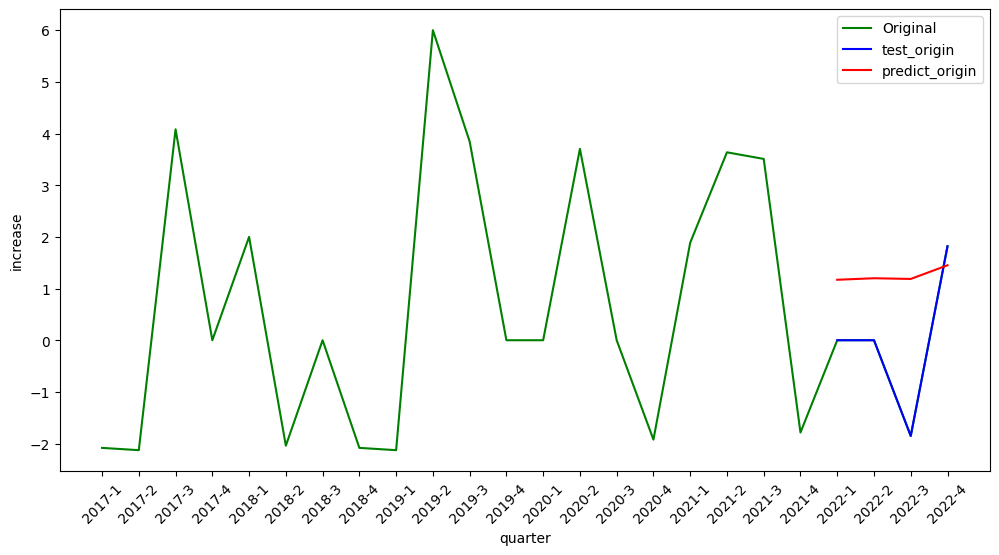

In [529]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [530]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -1.259871
std      1.393035
min     -3.037732
25%     -1.659055
50%     -1.184746
75%     -0.785562
max      0.367743
dtype: float64

In [531]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 33ms/step
[[0.38426107]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 0.9954835772514343 


## 원본 데이터에 예측값 추가하기

In [532]:
print(sales)
print(growth)
print(marketability)
print(increase)

17834711000.0
1.0037823
135797280.0
0.9954836


In [533]:
sin_pills.loc[24] = ['2023-1', '한식음식점', sales, growth, increase, marketability]

<ipython-input-533-5cf2b2deb9c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_pills.loc[24] = ['2023-1', '한식음식점', sales, growth, increase, marketability]


In [534]:
sin_pills

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,의약품,1.465109e+10,1.000000,-2.083333,8.776581e+07
1,2017-2,의약품,1.487897e+10,1.015554,-2.127660,8.828899e+07
2,2017-3,의약품,1.538836e+10,1.034235,4.081633,9.772411e+07
3,2017-4,의약품,1.447752e+10,0.940810,0.000000,8.854231e+07
4,2018-1,의약품,1.552629e+10,1.072441,2.000000,9.435408e+07
5,2018-2,의약품,1.547680e+10,0.996813,-2.040816,9.893250e+07
6,2018-3,의약품,1.549926e+10,1.001451,0.000000,1.026495e+08
7,2018-4,의약품,1.626261e+10,1.049251,-2.083333,1.107373e+08
8,2019-1,의약품,1.973360e+10,1.213434,-2.127660,1.934281e+08
9,2019-2,의약품,2.020761e+10,1.024020,6.000000,1.809292e+08


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [535]:
################ 매출 ####################

# 총 매출액을 예측하기 위한 지표로는 성장성, 시장성, 순점포증감률 선정.

### X / y 데이터 생성
X = sin_pills[['성장성', '시장성', '순점포증감률']]
y = sin_pills.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  8.776581e+07 -2.083333
1   1.015554  8.828899e+07 -2.127660
2   1.034235  9.772411e+07  4.081633
3   0.940810  8.854231e+07  0.000000
4   1.072441  9.435408e+07  2.000000
5   0.996813  9.893250e+07 -2.040816
6   1.001451  1.026495e+08  0.000000
7   1.049251  1.107373e+08 -2.083333
8   1.213434  1.934281e+08 -2.127660
9   1.024020  1.809292e+08  6.000000
10  0.923117  1.324538e+08  3.846154
11  1.173364  1.651199e+08  0.000000
12  1.017588  1.467750e+08  0.000000
13  0.990716  1.141362e+08  3.703704
14  0.938219  1.211135e+08  0.000000
15  1.070265  1.614356e+08 -1.923077
16  0.941047  1.476332e+08  1.886792
17  1.092118  1.527944e+08  3.636364
18  1.000494  1.386036e+08  3.508772
19  1.036539  1.424713e+08 -1.785714
20  0.999961  1.223943e+08  0.000000
21  1.039979  1.649853e+08  0.000000
22  1.001893  1.130446e+08 -1.851852
23  0.984404  1.610437e+08  1.818182
24  1.003782  1.357973e+08  0.995484
--------------------------------------

In [536]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [537]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.2111056  0.69351042 0.4854831 ]
 [0.27785356 0.45457553 0.38426107]]


In [538]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [539]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_76 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_77 (LSTM)              (None, 32)                12416     
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [540]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1957
Epoch 1: val_loss improved from inf to 0.63618, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.1957 - val_loss: 0.6362
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1881
Epoch 2: val_loss improved from 0.63618 to 0.61883, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.1881 - val_loss: 0.6188
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1809
Epoch 3: val_loss improved from 0.61883 to 0.60197, saving model to stock_model.h5
1/1 [==============================] - 0s 89ms/step - loss: 0.1809 - val_loss: 0.6020
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1739
Epoch 4: val_loss improved from 0.60197 to 0.58552, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.1739 - val_loss: 0.5855
Epoch 5/100
1/1 [=================

In [541]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 840ms/step
[[0.38155255]
 [0.4148623 ]
 [0.4268976 ]
 [0.36864126]]


In [542]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.99541,0.381553
2022-3,1.00000,0.414862
2022-4,0.96211,0.426898
2023-1,0.33148,0.368641


In [543]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_pills의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.99541,0.381553,2.455893e+10,1.834184e+10,6.217086e+09
2022-3,1.00000,0.414862,2.460541e+10,1.867920e+10,5.926211e+09
2022-4,0.96211,0.426898,2.422167e+10,1.880109e+10,5.420579e+09
2023-1,0.33148,0.368641,1.783471e+10,1.821108e+10,-3.763671e+08


In [544]:
df_test = df_test.reset_index()

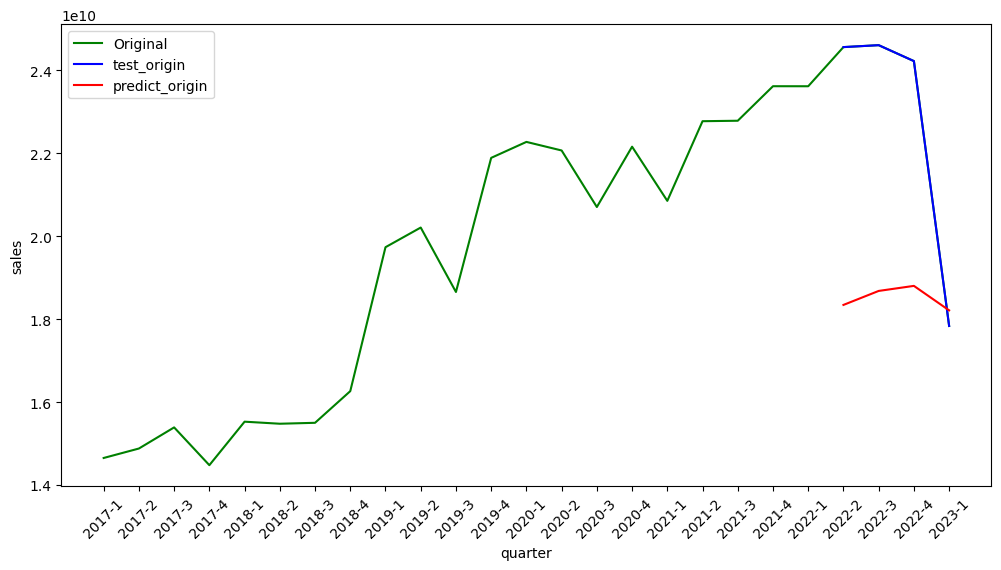

In [545]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [546]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.296877e+09
std      3.132829e+09
min     -3.763671e+08
25%      3.971342e+09
50%      5.673395e+09
75%      5.998930e+09
max      6.217086e+09
dtype: float64

In [547]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 24ms/step
[[0.48706543]]
--------------------------------------------------------------------------------
예측된 매출  : 19410464768.0 


### 성장성

In [548]:
### X / y 데이터 생성
X = sin_pills[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_pills.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   1.465109e+10  8.776581e+07 -2.083333
1   1.487897e+10  8.828899e+07 -2.127660
2   1.538836e+10  9.772411e+07  4.081633
3   1.447752e+10  8.854231e+07  0.000000
4   1.552629e+10  9.435408e+07  2.000000
5   1.547680e+10  9.893250e+07 -2.040816
6   1.549926e+10  1.026495e+08  0.000000
7   1.626261e+10  1.107373e+08 -2.083333
8   1.973360e+10  1.934281e+08 -2.127660
9   2.020761e+10  1.809292e+08  6.000000
10  1.865398e+10  1.324538e+08  3.846154
11  2.188790e+10  1.651199e+08  0.000000
12  2.227287e+10  1.467750e+08  0.000000
13  2.206609e+10  1.141362e+08  3.703704
14  2.070282e+10  1.211135e+08  0.000000
15  2.215750e+10  1.614356e+08 -1.923077
16  2.085124e+10  1.476332e+08  1.886792
17  2.277201e+10  1.527944e+08  3.636364
18  2.278326e+10  1.386036e+08  3.508772
19  2.361574e+10  1.424713e+08 -1.785714
20  2.361482e+10  1.223943e+08  0.000000
21  2.455893e+10  1.649853e+08  0.000000
22  2.460541e+10  1.130446e+08 -1.851852
23  2.422167e+10

In [549]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [550]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.96211044 0.69351042 0.4854831 ]
 [0.33147985 0.45457553 0.38426107]]


In [551]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [552]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_78 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_79 (LSTM)              (None, 32)                12416     
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [553]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2603
Epoch 1: val_loss improved from inf to 0.12968, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2603 - val_loss: 0.1297
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2524
Epoch 2: val_loss improved from 0.12968 to 0.12212, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.2524 - val_loss: 0.1221
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2448
Epoch 3: val_loss improved from 0.12212 to 0.11494, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.2448 - val_loss: 0.1149
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2374
Epoch 4: val_loss improved from 0.11494 to 0.10811, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2374 - val_loss: 0.1081
Epoch 5/100
1/1 [=================

In [554]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.24205683]
 [0.26901647]
 [0.26508167]
 [0.25701252]]


In [555]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.402535,0.242057
2022-3,0.271345,0.269016
2022-4,0.211106,0.265082
2023-1,0.277854,0.257013


In [556]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 3].values       # 성장성이 sin_pills의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.402535,0.242057,1.039979,0.993390,0.046589
2022-3,0.271345,0.269016,1.001893,1.001217,0.000676
2022-4,0.211106,0.265082,0.984404,1.000074,-0.015670
2023-1,0.277854,0.257013,1.003782,0.997732,0.006051


In [557]:
df_test = df_test.reset_index()

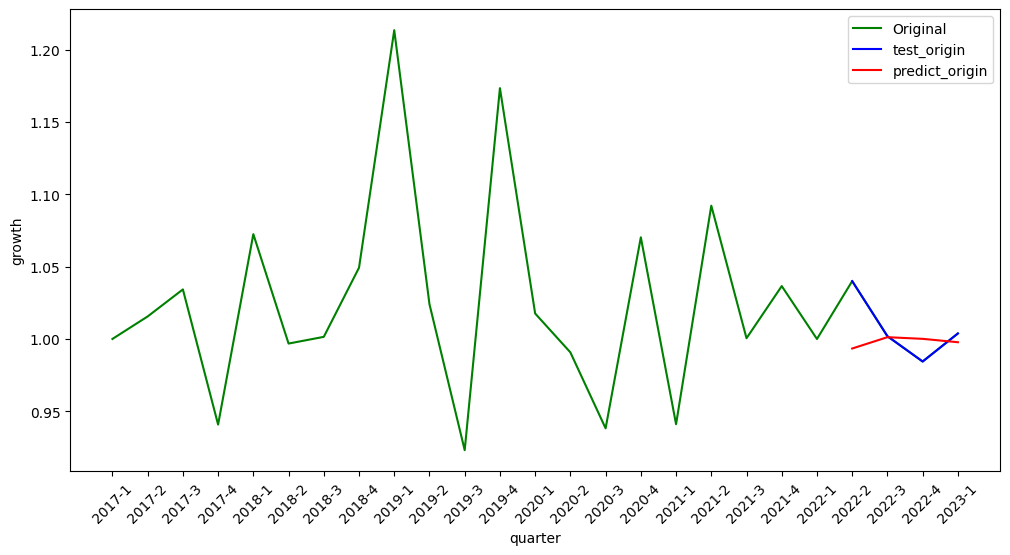

In [558]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [559]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.009411
std      0.026451
min     -0.015670
25%     -0.003411
50%      0.003363
75%      0.016185
max      0.046589
dtype: float64

In [560]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 21ms/step
[[0.29532963]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.008855938911438 


### 시장성

In [561]:
### X / y 데이터 생성
X = sin_pills[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_pills.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   1.465109e+10  1.000000 -2.083333
1   1.487897e+10  1.015554 -2.127660
2   1.538836e+10  1.034235  4.081633
3   1.447752e+10  0.940810  0.000000
4   1.552629e+10  1.072441  2.000000
5   1.547680e+10  0.996813 -2.040816
6   1.549926e+10  1.001451  0.000000
7   1.626261e+10  1.049251 -2.083333
8   1.973360e+10  1.213434 -2.127660
9   2.020761e+10  1.024020  6.000000
10  1.865398e+10  0.923117  3.846154
11  2.188790e+10  1.173364  0.000000
12  2.227287e+10  1.017588  0.000000
13  2.206609e+10  0.990716  3.703704
14  2.070282e+10  0.938219  0.000000
15  2.215750e+10  1.070265 -1.923077
16  2.085124e+10  0.941047  1.886792
17  2.277201e+10  1.092118  3.636364
18  2.278326e+10  1.000494  3.508772
19  2.361574e+10  1.036539 -1.785714
20  2.361482e+10  0.999961  0.000000
21  2.455893e+10  1.039979  0.000000
22  2.460541e+10  1.001893 -1.851852
23  2.422167e+10  0.984404  1.818182
24  1.783471e+10  1.003782  0.995484
--------------------------------------

In [562]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [563]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.96211044 0.2111056  0.4854831 ]
 [0.33147985 0.27785356 0.38426107]]


In [564]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [565]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_80 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_81 (LSTM)              (None, 32)                12416     
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [566]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2812
Epoch 1: val_loss improved from inf to 0.25432, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2812 - val_loss: 0.2543
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2730
Epoch 2: val_loss improved from 0.25432 to 0.24333, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2730 - val_loss: 0.2433
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2652
Epoch 3: val_loss improved from 0.24333 to 0.23278, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.2652 - val_loss: 0.2328
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2577
Epoch 4: val_loss improved from 0.23278 to 0.22261, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2577 - val_loss: 0.2226
Epoch 5/100
1/1 [=================

In [567]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.41356254]
 [0.44438428]
 [0.44512922]
 [0.4278255 ]]


In [568]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.730814,0.413563
2022-3,0.239241,0.444384
2022-4,0.693510,0.445129
2023-1,0.454576,0.427826


In [569]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 5].values       # 시장성이 sin_pills의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.730814,0.413563,1.649853e+08,131463760.0,3.352153e+07
2022-3,0.239241,0.444384,1.130446e+08,134720448.0,-2.167589e+07
2022-4,0.693510,0.445129,1.610437e+08,134799168.0,2.624451e+07
2023-1,0.454576,0.427826,1.357973e+08,132970816.0,2.826464e+06


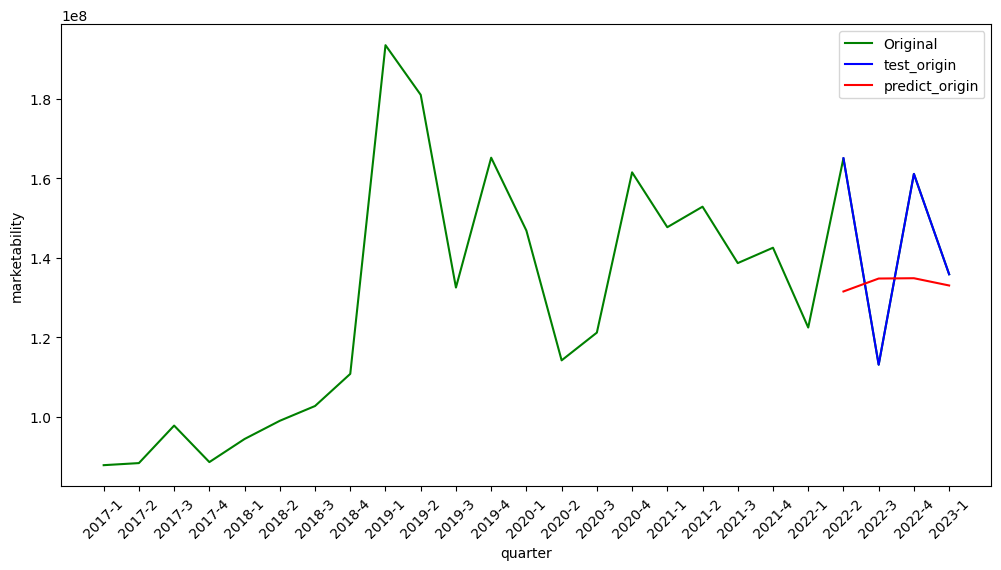

In [570]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [571]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.022915e+07
std      2.497838e+07
min     -2.167589e+07
25%     -3.299124e+06
50%      1.453549e+07
75%      2.806377e+07
max      3.352153e+07
dtype: float64

In [572]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 33ms/step
[[0.4423873]]
--------------------------------------------------------------------------------
예측된 시장성  : 134509440.0 


### 순점포증감률

In [573]:
### X / y 데이터 생성
X = sin_pills[['분기당_매출_금액', '성장성', '시장성']]
y = sin_pills.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.465109e+10  1.000000  8.776581e+07
1   1.487897e+10  1.015554  8.828899e+07
2   1.538836e+10  1.034235  9.772411e+07
3   1.447752e+10  0.940810  8.854231e+07
4   1.552629e+10  1.072441  9.435408e+07
5   1.547680e+10  0.996813  9.893250e+07
6   1.549926e+10  1.001451  1.026495e+08
7   1.626261e+10  1.049251  1.107373e+08
8   1.973360e+10  1.213434  1.934281e+08
9   2.020761e+10  1.024020  1.809292e+08
10  1.865398e+10  0.923117  1.324538e+08
11  2.188790e+10  1.173364  1.651199e+08
12  2.227287e+10  1.017588  1.467750e+08
13  2.206609e+10  0.990716  1.141362e+08
14  2.070282e+10  0.938219  1.211135e+08
15  2.215750e+10  1.070265  1.614356e+08
16  2.085124e+10  0.941047  1.476332e+08
17  2.277201e+10  1.092118  1.527944e+08
18  2.278326e+10  1.000494  1.386036e+08
19  2.361574e+10  1.036539  1.424713e+08
20  2.361482e+10  0.999961  1.223943e+08
21  2.455893e+10  1.039979  1.649853e+08
22  2.460541e+10  1.001893  1.130446e+08
23  2.422167e+10

In [574]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [575]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.96211044 0.2111056  0.69351042]
 [0.33147985 0.27785356 0.45457553]]


In [576]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [577]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_82 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_83 (LSTM)              (None, 32)                12416     
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [578]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2598
Epoch 1: val_loss improved from inf to 0.24625, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2598 - val_loss: 0.2462
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2517
Epoch 2: val_loss improved from 0.24625 to 0.23653, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.2517 - val_loss: 0.2365
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2440
Epoch 3: val_loss improved from 0.23653 to 0.22717, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.2440 - val_loss: 0.2272
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2365
Epoch 4: val_loss improved from 0.22717 to 0.21815, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.2365 - val_loss: 0.2182
Epoch 5/100
1/1 [=================

In [579]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 809ms/step
[[0.4000753 ]
 [0.40130413]
 [0.4325496 ]
 [0.38200372]]


In [580]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.261780,0.400075
2022-3,0.033934,0.401304
2022-4,0.485483,0.432550
2023-1,0.384261,0.382004


In [581]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_pills의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.261780,0.400075,0.000000,1.124016,-1.124016
2022-3,0.033934,0.401304,-1.851852,1.134004,-2.985856
2022-4,0.485483,0.432550,1.818182,1.387956,0.430225
2023-1,0.384261,0.382004,0.995484,0.977137,0.018347


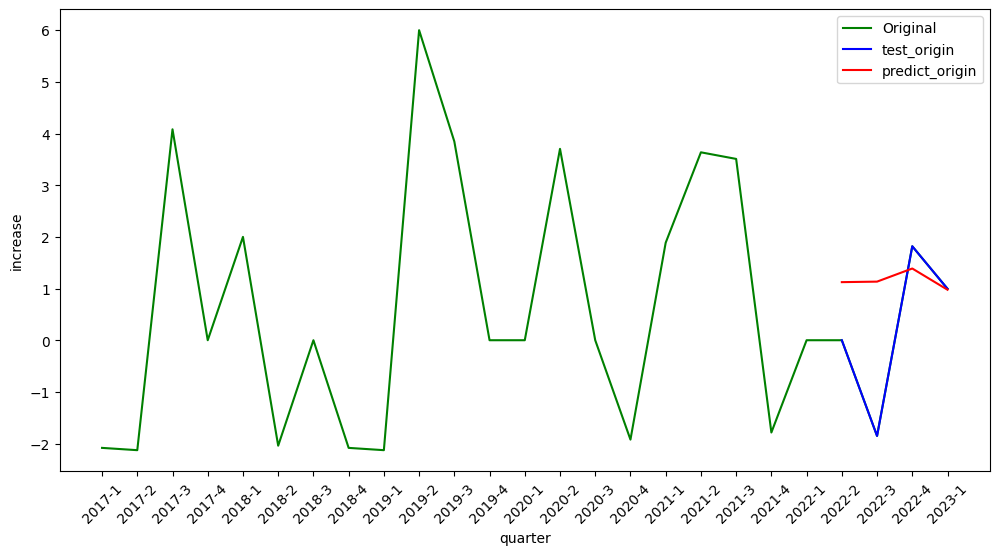

In [582]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [583]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.915325
std      1.528932
min     -2.985856
25%     -1.589476
50%     -0.552835
75%      0.121317
max      0.430225
dtype: float64

In [584]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 22ms/step
[[0.40088448]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 1.1305930614471436 


### 추가


In [585]:
sin_pills.loc[25] = ['2023-2', '한식음식점', sales, growth, increase, marketability]

<ipython-input-585-c1f2adacbab6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_pills.loc[25] = ['2023-2', '한식음식점', sales, growth, increase, marketability]


In [586]:
sin_pills

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,의약품,1.465109e+10,1.000000,-2.083333,8.776581e+07
1,2017-2,의약품,1.487897e+10,1.015554,-2.127660,8.828899e+07
2,2017-3,의약품,1.538836e+10,1.034235,4.081633,9.772411e+07
3,2017-4,의약품,1.447752e+10,0.940810,0.000000,8.854231e+07
4,2018-1,의약품,1.552629e+10,1.072441,2.000000,9.435408e+07
5,2018-2,의약품,1.547680e+10,0.996813,-2.040816,9.893250e+07
6,2018-3,의약품,1.549926e+10,1.001451,0.000000,1.026495e+08
7,2018-4,의약품,1.626261e+10,1.049251,-2.083333,1.107373e+08
8,2019-1,의약품,1.973360e+10,1.213434,-2.127660,1.934281e+08
9,2019-2,의약품,2.020761e+10,1.024020,6.000000,1.809292e+08


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [587]:
################ 매출 ####################

### X / y 데이터 생성
X = sin_pills[['성장성', '시장성', '순점포증감률']]
y = sin_pills.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  8.776581e+07 -2.083333
1   1.015554  8.828899e+07 -2.127660
2   1.034235  9.772411e+07  4.081633
3   0.940810  8.854231e+07  0.000000
4   1.072441  9.435408e+07  2.000000
5   0.996813  9.893250e+07 -2.040816
6   1.001451  1.026495e+08  0.000000
7   1.049251  1.107373e+08 -2.083333
8   1.213434  1.934281e+08 -2.127660
9   1.024020  1.809292e+08  6.000000
10  0.923117  1.324538e+08  3.846154
11  1.173364  1.651199e+08  0.000000
12  1.017588  1.467750e+08  0.000000
13  0.990716  1.141362e+08  3.703704
14  0.938219  1.211135e+08  0.000000
15  1.070265  1.614356e+08 -1.923077
16  0.941047  1.476332e+08  1.886792
17  1.092118  1.527944e+08  3.636364
18  1.000494  1.386036e+08  3.508772
19  1.036539  1.424713e+08 -1.785714
20  0.999961  1.223943e+08  0.000000
21  1.039979  1.649853e+08  0.000000
22  1.001893  1.130446e+08 -1.851852
23  0.984404  1.610437e+08  1.818182
24  1.003782  1.357973e+08  0.995484
25  1.008856  1.345094e+08  1.130593
-

In [588]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [589]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.27785356 0.45457553 0.38426107]
 [0.29532984 0.44238726 0.40088449]]


In [590]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [591]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_85 (LSTM)              (None, 32)                12416     
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [592]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2305
Epoch 1: val_loss improved from inf to 0.68894, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2305 - val_loss: 0.6889
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2219
Epoch 2: val_loss improved from 0.68894 to 0.67161, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2219 - val_loss: 0.6716
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2137
Epoch 3: val_loss improved from 0.67161 to 0.65476, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.2137 - val_loss: 0.6548
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2058
Epoch 4: val_loss improved from 0.65476 to 0.63830, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.2058 - val_loss: 0.6383
Epoch 5/100
1/1 [=================

In [593]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 782ms/step
[[0.45236865]
 [0.47117892]
 [0.40225825]
 [0.5250158 ]]


In [594]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,1.000000,0.452369
2022-4,0.962110,0.471179
2023-1,0.331480,0.402258
2023-2,0.487065,0.525016


In [595]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_pills의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,1.000000,0.452369,2.460541e+10,1.905906e+10,5.546352e+09
2022-4,0.962110,0.471179,2.422167e+10,1.924957e+10,4.972102e+09
2023-1,0.331480,0.402258,1.783471e+10,1.855155e+10,-7.168369e+08
2023-2,0.487065,0.525016,1.941046e+10,1.979482e+10,-3.843564e+08


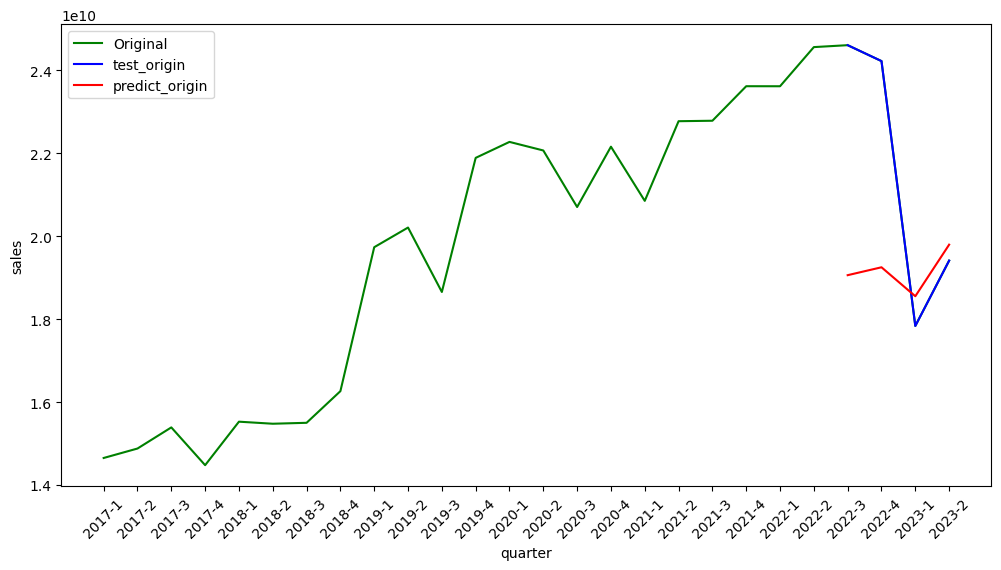

In [596]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [597]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.354315e+09
std      3.365224e+09
min     -7.168369e+08
25%     -4.674765e+08
50%      2.293873e+09
75%      5.115664e+09
max      5.546352e+09
dtype: float64

In [598]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.47691527]]
--------------------------------------------------------------------------------
예측된 매출  : 19307665408.0 


### 성장성

In [599]:
X = sin_pills[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_pills.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   1.465109e+10  8.776581e+07 -2.083333
1   1.487897e+10  8.828899e+07 -2.127660
2   1.538836e+10  9.772411e+07  4.081633
3   1.447752e+10  8.854231e+07  0.000000
4   1.552629e+10  9.435408e+07  2.000000
5   1.547680e+10  9.893250e+07 -2.040816
6   1.549926e+10  1.026495e+08  0.000000
7   1.626261e+10  1.107373e+08 -2.083333
8   1.973360e+10  1.934281e+08 -2.127660
9   2.020761e+10  1.809292e+08  6.000000
10  1.865398e+10  1.324538e+08  3.846154
11  2.188790e+10  1.651199e+08  0.000000
12  2.227287e+10  1.467750e+08  0.000000
13  2.206609e+10  1.141362e+08  3.703704
14  2.070282e+10  1.211135e+08  0.000000
15  2.215750e+10  1.614356e+08 -1.923077
16  2.085124e+10  1.476332e+08  1.886792
17  2.277201e+10  1.527944e+08  3.636364
18  2.278326e+10  1.386036e+08  3.508772
19  2.361574e+10  1.424713e+08 -1.785714
20  2.361482e+10  1.223943e+08  0.000000
21  2.455893e+10  1.649853e+08  0.000000
22  2.460541e+10  1.130446e+08 -1.851852
23  2.422167e+10

In [600]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [601]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.33147985 0.45457553 0.38426107]
 [0.48706541 0.44238726 0.40088449]]


In [602]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [603]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_86 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_87 (LSTM)              (None, 32)                12416     
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [604]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2446
Epoch 1: val_loss improved from inf to 0.14328, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2446 - val_loss: 0.1433
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2368
Epoch 2: val_loss improved from 0.14328 to 0.13533, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2368 - val_loss: 0.1353
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2294
Epoch 3: val_loss improved from 0.13533 to 0.12776, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2294 - val_loss: 0.1278
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2222
Epoch 4: val_loss improved from 0.12776 to 0.12054, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2222 - val_loss: 0.1205
Epoch 5/100
1/1 [=================

In [605]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 831ms/step
[[0.30810583]
 [0.30529663]
 [0.2944524 ]
 [0.33695886]]


In [606]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.271345,0.308106
2022-4,0.211106,0.305297
2023-1,0.277854,0.294452
2023-2,0.295330,0.336959


In [607]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 3].values       # 성장성이 sin_pills의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.271345,0.308106,1.001893,1.012565,-0.010672
2022-4,0.211106,0.305297,0.984404,1.011749,-0.027345
2023-1,0.277854,0.294452,1.003782,1.008601,-0.004819
2023-2,0.295330,0.336959,1.008856,1.020941,-0.012086


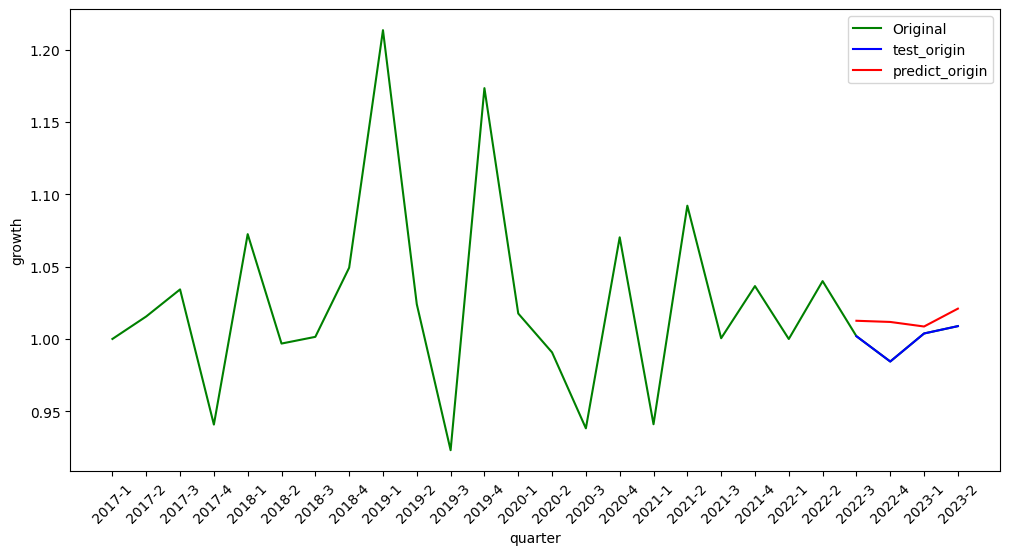

In [608]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [609]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.013731
std      0.009606
min     -0.027345
25%     -0.015900
50%     -0.011379
75%     -0.009209
max     -0.004819
dtype: float64

In [610]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.2826106]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.005163311958313 


### 시장성

In [611]:
### X / y 데이터 생성
X = sin_pills[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_pills.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   1.465109e+10  1.000000 -2.083333
1   1.487897e+10  1.015554 -2.127660
2   1.538836e+10  1.034235  4.081633
3   1.447752e+10  0.940810  0.000000
4   1.552629e+10  1.072441  2.000000
5   1.547680e+10  0.996813 -2.040816
6   1.549926e+10  1.001451  0.000000
7   1.626261e+10  1.049251 -2.083333
8   1.973360e+10  1.213434 -2.127660
9   2.020761e+10  1.024020  6.000000
10  1.865398e+10  0.923117  3.846154
11  2.188790e+10  1.173364  0.000000
12  2.227287e+10  1.017588  0.000000
13  2.206609e+10  0.990716  3.703704
14  2.070282e+10  0.938219  0.000000
15  2.215750e+10  1.070265 -1.923077
16  2.085124e+10  0.941047  1.886792
17  2.277201e+10  1.092118  3.636364
18  2.278326e+10  1.000494  3.508772
19  2.361574e+10  1.036539 -1.785714
20  2.361482e+10  0.999961  0.000000
21  2.455893e+10  1.039979  0.000000
22  2.460541e+10  1.001893 -1.851852
23  2.422167e+10  0.984404  1.818182
24  1.783471e+10  1.003782  0.995484
25  1.941046e+10  1.008856  1.130593
-

In [612]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [613]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.33147985 0.27785356 0.38426107]
 [0.48706541 0.29532984 0.40088449]]


In [614]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [615]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_88 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_89 (LSTM)              (None, 32)                12416     
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [616]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2644
Epoch 1: val_loss improved from inf to 0.31389, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2644 - val_loss: 0.3139
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2564
Epoch 2: val_loss improved from 0.31389 to 0.30168, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.2564 - val_loss: 0.3017
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2487
Epoch 3: val_loss improved from 0.30168 to 0.28991, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.2487 - val_loss: 0.2899
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2413
Epoch 4: val_loss improved from 0.28991 to 0.27853, saving model to stock_model.h5
1/1 [==============================] - 0s 123ms/step - loss: 0.2413 - val_loss: 0.2785
Epoch 5/100
1/1 [================

In [617]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.5188045 ]
 [0.5222949 ]
 [0.49996322]
 [0.51193047]]


In [618]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.239241,0.518804
2022-4,0.693510,0.522295
2023-1,0.454576,0.499963
2023-2,0.442387,0.511930


In [619]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 5].values       # 시장성이 sin_pills의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.239241,0.518804,1.130446e+08,142583856.0,-2.953930e+07
2022-4,0.693510,0.522295,1.610437e+08,142952672.0,1.809101e+07
2023-1,0.454576,0.499963,1.357973e+08,140593040.0,-4.795760e+06
2023-2,0.442387,0.511930,1.345094e+08,141857536.0,-7.348096e+06


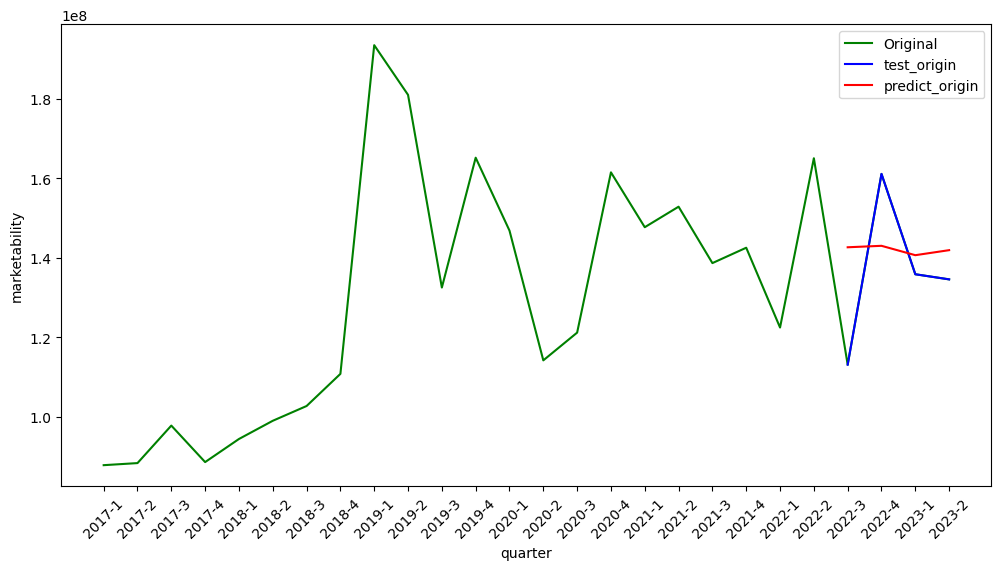

In [620]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [621]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -5.898037e+06
std      1.947392e+07
min     -2.953930e+07
25%     -1.289590e+07
50%     -6.071928e+06
75%      9.259316e+05
max      1.809101e+07
dtype: float64

In [622]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 23ms/step
[[0.430085]]
--------------------------------------------------------------------------------
예측된 시장성  : 133209552.0 


### 순점포증감률

In [623]:
### X / y 데이터 생성
X = sin_pills[['분기당_매출_금액', '성장성', '시장성']]
y = sin_pills.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.465109e+10  1.000000  8.776581e+07
1   1.487897e+10  1.015554  8.828899e+07
2   1.538836e+10  1.034235  9.772411e+07
3   1.447752e+10  0.940810  8.854231e+07
4   1.552629e+10  1.072441  9.435408e+07
5   1.547680e+10  0.996813  9.893250e+07
6   1.549926e+10  1.001451  1.026495e+08
7   1.626261e+10  1.049251  1.107373e+08
8   1.973360e+10  1.213434  1.934281e+08
9   2.020761e+10  1.024020  1.809292e+08
10  1.865398e+10  0.923117  1.324538e+08
11  2.188790e+10  1.173364  1.651199e+08
12  2.227287e+10  1.017588  1.467750e+08
13  2.206609e+10  0.990716  1.141362e+08
14  2.070282e+10  0.938219  1.211135e+08
15  2.215750e+10  1.070265  1.614356e+08
16  2.085124e+10  0.941047  1.476332e+08
17  2.277201e+10  1.092118  1.527944e+08
18  2.278326e+10  1.000494  1.386036e+08
19  2.361574e+10  1.036539  1.424713e+08
20  2.361482e+10  0.999961  1.223943e+08
21  2.455893e+10  1.039979  1.649853e+08
22  2.460541e+10  1.001893  1.130446e+08
23  2.422167e+10

In [624]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [625]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.33147985 0.27785356 0.45457553]
 [0.48706541 0.29532984 0.44238726]]


In [626]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [627]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_90 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_91 (LSTM)              (None, 32)                12416     
                                                                 
 dense_45 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [628]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2856
Epoch 1: val_loss improved from inf to 0.18673, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2856 - val_loss: 0.1867
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2764
Epoch 2: val_loss improved from 0.18673 to 0.17844, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2764 - val_loss: 0.1784
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2676
Epoch 3: val_loss improved from 0.17844 to 0.17056, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.2676 - val_loss: 0.1706
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2590
Epoch 4: val_loss improved from 0.17056 to 0.16303, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.2590 - val_loss: 0.1630
Epoch 5/100
1/1 [=================

In [629]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 793ms/step
[[0.35179114]
 [0.3765465 ]
 [0.33856046]
 [0.34542003]]


In [630]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.033934,0.351791
2022-4,0.485483,0.376547
2023-1,0.384261,0.338560
2023-2,0.400884,0.345420


In [631]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_pills의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.033934,0.351791,-1.851852,0.731579,-2.583431
2022-4,0.485483,0.376547,1.818182,0.932782,0.885400
2023-1,0.384261,0.338560,0.995484,0.624045,0.371439
2023-2,0.400884,0.345420,1.130593,0.679797,0.450796


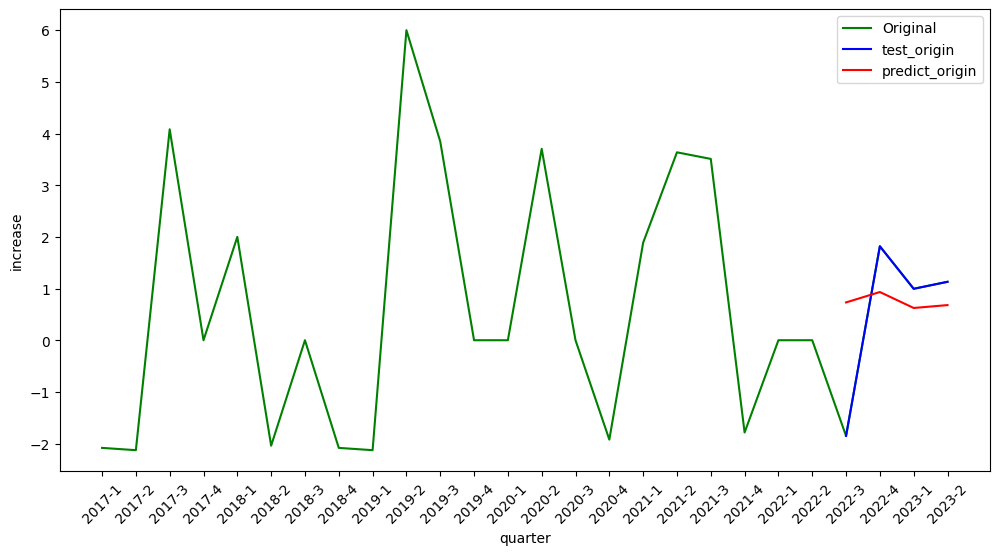

In [632]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [633]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.218949
std      1.592428
min     -2.583431
25%     -0.367278
50%      0.411118
75%      0.559447
max      0.885400
dtype: float64

In [634]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 24ms/step
[[0.28983787]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 0.22804392874240875 


### 추가

In [635]:
sin_pills.loc[26] = ['2023-3', '한식음식점', sales, growth, increase, marketability]

<ipython-input-635-7bec26e31cf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_pills.loc[26] = ['2023-3', '한식음식점', sales, growth, increase, marketability]


In [636]:
sin_pills

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,의약품,1.465109e+10,1.000000,-2.083333,8.776581e+07
1,2017-2,의약품,1.487897e+10,1.015554,-2.127660,8.828899e+07
2,2017-3,의약품,1.538836e+10,1.034235,4.081633,9.772411e+07
3,2017-4,의약품,1.447752e+10,0.940810,0.000000,8.854231e+07
4,2018-1,의약품,1.552629e+10,1.072441,2.000000,9.435408e+07
5,2018-2,의약품,1.547680e+10,0.996813,-2.040816,9.893250e+07
6,2018-3,의약품,1.549926e+10,1.001451,0.000000,1.026495e+08
7,2018-4,의약품,1.626261e+10,1.049251,-2.083333,1.107373e+08
8,2019-1,의약품,1.973360e+10,1.213434,-2.127660,1.934281e+08
9,2019-2,의약품,2.020761e+10,1.024020,6.000000,1.809292e+08


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [637]:
### X / y 데이터 생성
X = sin_pills[['성장성', '시장성', '순점포증감률']]
y = sin_pills.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  8.776581e+07 -2.083333
1   1.015554  8.828899e+07 -2.127660
2   1.034235  9.772411e+07  4.081633
3   0.940810  8.854231e+07  0.000000
4   1.072441  9.435408e+07  2.000000
5   0.996813  9.893250e+07 -2.040816
6   1.001451  1.026495e+08  0.000000
7   1.049251  1.107373e+08 -2.083333
8   1.213434  1.934281e+08 -2.127660
9   1.024020  1.809292e+08  6.000000
10  0.923117  1.324538e+08  3.846154
11  1.173364  1.651199e+08  0.000000
12  1.017588  1.467750e+08  0.000000
13  0.990716  1.141362e+08  3.703704
14  0.938219  1.211135e+08  0.000000
15  1.070265  1.614356e+08 -1.923077
16  0.941047  1.476332e+08  1.886792
17  1.092118  1.527944e+08  3.636364
18  1.000494  1.386036e+08  3.508772
19  1.036539  1.424713e+08 -1.785714
20  0.999961  1.223943e+08  0.000000
21  1.039979  1.649853e+08  0.000000
22  1.001893  1.130446e+08 -1.851852
23  0.984404  1.610437e+08  1.818182
24  1.003782  1.357973e+08  0.995484
25  1.008856  1.345094e+08  1.130593
2

In [638]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [639]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.29532984 0.44238726 0.40088449]
 [0.28261056 0.43008496 0.28983787]]


In [640]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [641]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_92 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_93 (LSTM)              (None, 32)                12416     
                                                                 
 dense_46 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [642]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2305
Epoch 1: val_loss improved from inf to 0.72688, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2305 - val_loss: 0.7269
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2219
Epoch 2: val_loss improved from 0.72688 to 0.70925, saving model to stock_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.2219 - val_loss: 0.7092
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2137
Epoch 3: val_loss improved from 0.70925 to 0.69208, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.2137 - val_loss: 0.6921
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2058
Epoch 4: val_loss improved from 0.69208 to 0.67532, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.2058 - val_loss: 0.6753
Epoch 5/100
1/1 [================

In [643]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.47117892]
 [0.40225825]
 [0.5250158 ]
 [0.47691527]]


In [644]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.962110,0.471179
2023-1,0.331480,0.402258
2023-2,0.487065,0.525016
2023-3,0.476915,0.476915


In [645]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_pills의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.962110,0.471179,2.422167e+10,1.924957e+10,4.972102e+09
2023-1,0.331480,0.402258,1.783471e+10,1.855155e+10,-7.168369e+08
2023-2,0.487065,0.525016,1.941046e+10,1.979482e+10,-3.843564e+08
2023-3,0.476915,0.476915,1.930767e+10,1.930767e+10,0.000000e+00


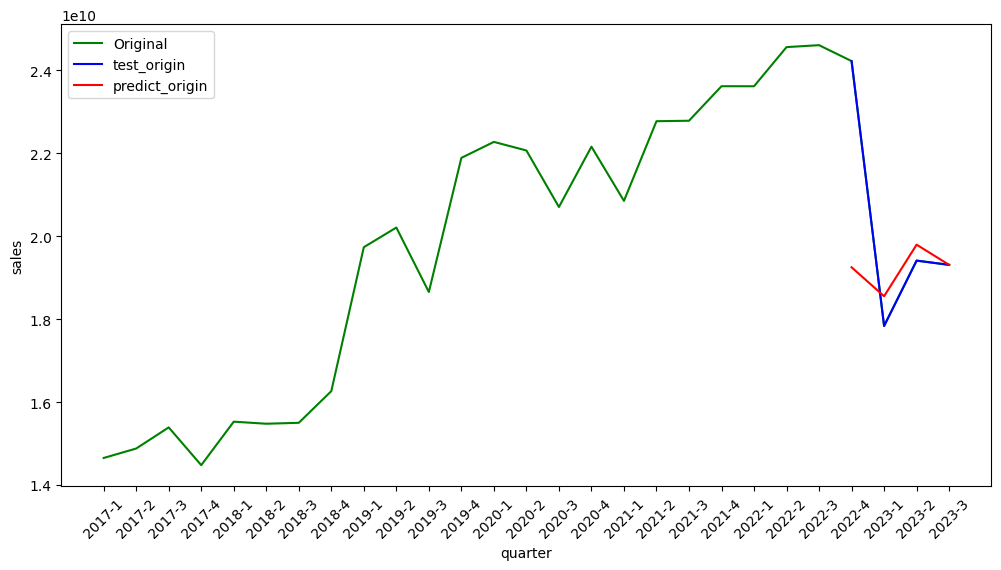

In [646]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [647]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     9.677271e+08
std      2.685603e+09
min     -7.168369e+08
25%     -4.674765e+08
50%     -1.921782e+08
75%      1.243025e+09
max      4.972102e+09
dtype: float64

In [648]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.4686439]]
--------------------------------------------------------------------------------
예측된 매출  : 19223894016.0 


### 성장성

In [649]:
X = sin_pills[['분기당_매출_금액', '시장성', '순점포증감률']]
y = sin_pills.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   1.465109e+10  8.776581e+07 -2.083333
1   1.487897e+10  8.828899e+07 -2.127660
2   1.538836e+10  9.772411e+07  4.081633
3   1.447752e+10  8.854231e+07  0.000000
4   1.552629e+10  9.435408e+07  2.000000
5   1.547680e+10  9.893250e+07 -2.040816
6   1.549926e+10  1.026495e+08  0.000000
7   1.626261e+10  1.107373e+08 -2.083333
8   1.973360e+10  1.934281e+08 -2.127660
9   2.020761e+10  1.809292e+08  6.000000
10  1.865398e+10  1.324538e+08  3.846154
11  2.188790e+10  1.651199e+08  0.000000
12  2.227287e+10  1.467750e+08  0.000000
13  2.206609e+10  1.141362e+08  3.703704
14  2.070282e+10  1.211135e+08  0.000000
15  2.215750e+10  1.614356e+08 -1.923077
16  2.085124e+10  1.476332e+08  1.886792
17  2.277201e+10  1.527944e+08  3.636364
18  2.278326e+10  1.386036e+08  3.508772
19  2.361574e+10  1.424713e+08 -1.785714
20  2.361482e+10  1.223943e+08  0.000000
21  2.455893e+10  1.649853e+08  0.000000
22  2.460541e+10  1.130446e+08 -1.851852
23  2.422167e+10

In [650]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [651]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.48706541 0.44238726 0.40088449]
 [0.47691528 0.43008496 0.28983787]]


In [652]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [653]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_94 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_95 (LSTM)              (None, 32)                12416     
                                                                 
 dense_47 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [654]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2446
Epoch 1: val_loss improved from inf to 0.13661, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2446 - val_loss: 0.1366
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2368
Epoch 2: val_loss improved from 0.13661 to 0.12880, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.2368 - val_loss: 0.1288
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2294
Epoch 3: val_loss improved from 0.12880 to 0.12137, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.2294 - val_loss: 0.1214
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2222
Epoch 4: val_loss improved from 0.12137 to 0.11429, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2222 - val_loss: 0.1143
Epoch 5/100
1/1 [=================

In [655]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.2851179 ]
 [0.27557454]
 [0.31453666]
 [0.26449212]]


In [656]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.211106,0.285118
2023-1,0.277854,0.275575
2023-2,0.295330,0.314537
2023-3,0.282611,0.264492


In [657]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 3].values       # 성장성이 sin_pills의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.211106,0.285118,0.984404,1.005891,-0.021487
2023-1,0.277854,0.275575,1.003782,1.003121,0.000662
2023-2,0.295330,0.314537,1.008856,1.014432,-0.005576
2023-3,0.282611,0.264492,1.005163,0.999903,0.005260


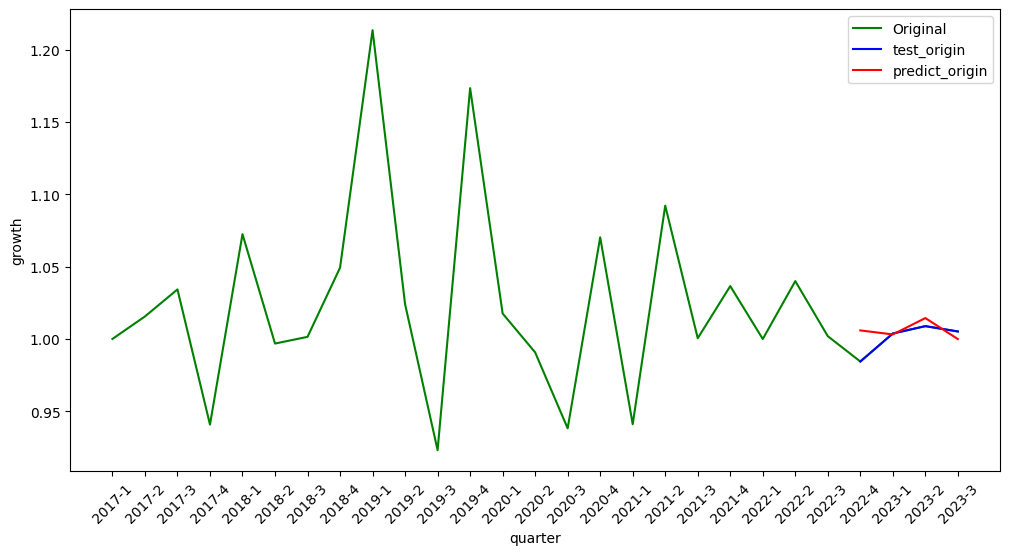

In [658]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [659]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.005285
std      0.011678
min     -0.021487
25%     -0.009554
50%     -0.002457
75%      0.001811
max      0.005260
dtype: float64

In [660]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 43ms/step
[[0.26696503]]
--------------------------------------------------------------------------------
예측된 성장성  : 1.0006211996078491 


###시장성

In [661]:
### X / y 데이터 생성
X = sin_pills[['분기당_매출_금액', '성장성', '순점포증감률']]
y = sin_pills.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   1.465109e+10  1.000000 -2.083333
1   1.487897e+10  1.015554 -2.127660
2   1.538836e+10  1.034235  4.081633
3   1.447752e+10  0.940810  0.000000
4   1.552629e+10  1.072441  2.000000
5   1.547680e+10  0.996813 -2.040816
6   1.549926e+10  1.001451  0.000000
7   1.626261e+10  1.049251 -2.083333
8   1.973360e+10  1.213434 -2.127660
9   2.020761e+10  1.024020  6.000000
10  1.865398e+10  0.923117  3.846154
11  2.188790e+10  1.173364  0.000000
12  2.227287e+10  1.017588  0.000000
13  2.206609e+10  0.990716  3.703704
14  2.070282e+10  0.938219  0.000000
15  2.215750e+10  1.070265 -1.923077
16  2.085124e+10  0.941047  1.886792
17  2.277201e+10  1.092118  3.636364
18  2.278326e+10  1.000494  3.508772
19  2.361574e+10  1.036539 -1.785714
20  2.361482e+10  0.999961  0.000000
21  2.455893e+10  1.039979  0.000000
22  2.460541e+10  1.001893 -1.851852
23  2.422167e+10  0.984404  1.818182
24  1.783471e+10  1.003782  0.995484
25  1.941046e+10  1.008856  1.130593
2

In [662]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [663]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.48706541 0.29532984 0.40088449]
 [0.47691528 0.28261056 0.28983787]]


In [664]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [665]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_96 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_97 (LSTM)              (None, 32)                12416     
                                                                 
 dense_48 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [666]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2644
Epoch 1: val_loss improved from inf to 0.28597, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2644 - val_loss: 0.2860
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2564
Epoch 2: val_loss improved from 0.28597 to 0.27449, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.2564 - val_loss: 0.2745
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2487
Epoch 3: val_loss improved from 0.27449 to 0.26343, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.2487 - val_loss: 0.2634
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2413
Epoch 4: val_loss improved from 0.26343 to 0.25276, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2413 - val_loss: 0.2528
Epoch 5/100
1/1 [=================

In [667]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 788ms/step
[[0.48305425]
 [0.46324354]
 [0.47493947]
 [0.4009589 ]]


In [668]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.693510,0.483054
2023-1,0.454576,0.463244
2023-2,0.442387,0.474939
2023-3,0.430085,0.400959


In [669]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 5].values       # 시장성이 sin_pills의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.693510,0.483054,1.610437e+08,138806400.0,2.223728e+07
2023-1,0.454576,0.463244,1.357973e+08,136713168.0,-9.158880e+05
2023-2,0.442387,0.474939,1.345094e+08,137948992.0,-3.439552e+06
2023-3,0.430085,0.400959,1.332096e+08,130132032.0,3.077520e+06


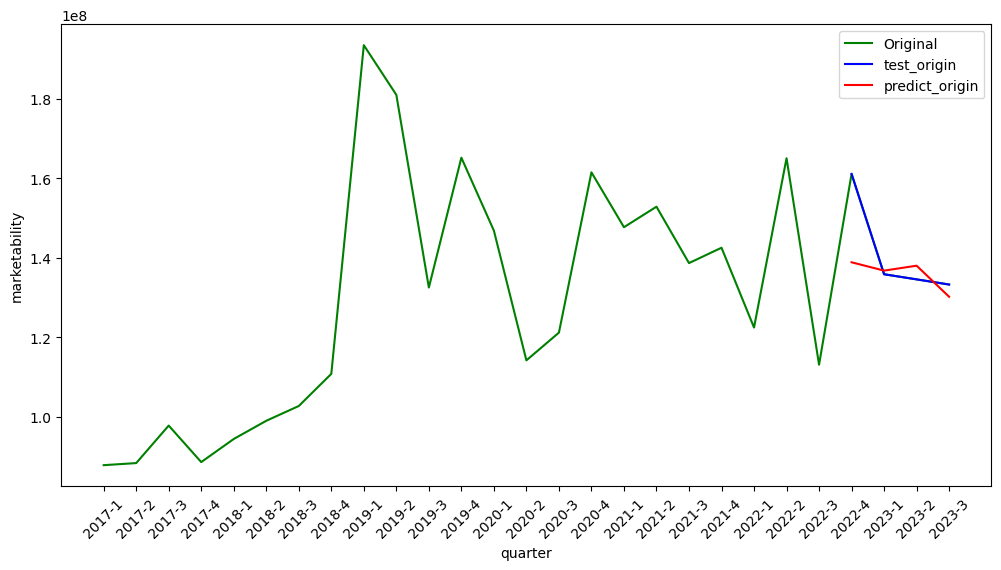

In [670]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [671]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     5.239840e+06
std      1.164493e+07
min     -3.439552e+06
25%     -1.546804e+06
50%      1.080816e+06
75%      7.867460e+06
max      2.223728e+07
dtype: float64

In [672]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 22ms/step
[[0.41513354]]
--------------------------------------------------------------------------------
예측된 시장성  : 131629752.0 


### 순점포증감률

In [673]:
### X / y 데이터 생성
X = sin_pills[['분기당_매출_금액', '성장성', '시장성']]
y = sin_pills.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   1.465109e+10  1.000000  8.776581e+07
1   1.487897e+10  1.015554  8.828899e+07
2   1.538836e+10  1.034235  9.772411e+07
3   1.447752e+10  0.940810  8.854231e+07
4   1.552629e+10  1.072441  9.435408e+07
5   1.547680e+10  0.996813  9.893250e+07
6   1.549926e+10  1.001451  1.026495e+08
7   1.626261e+10  1.049251  1.107373e+08
8   1.973360e+10  1.213434  1.934281e+08
9   2.020761e+10  1.024020  1.809292e+08
10  1.865398e+10  0.923117  1.324538e+08
11  2.188790e+10  1.173364  1.651199e+08
12  2.227287e+10  1.017588  1.467750e+08
13  2.206609e+10  0.990716  1.141362e+08
14  2.070282e+10  0.938219  1.211135e+08
15  2.215750e+10  1.070265  1.614356e+08
16  2.085124e+10  0.941047  1.476332e+08
17  2.277201e+10  1.092118  1.527944e+08
18  2.278326e+10  1.000494  1.386036e+08
19  2.361574e+10  1.036539  1.424713e+08
20  2.361482e+10  0.999961  1.223943e+08
21  2.455893e+10  1.039979  1.649853e+08
22  2.460541e+10  1.001893  1.130446e+08
23  2.422167e+10

In [674]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [675]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.48706541 0.29532984 0.44238726]
 [0.47691528 0.28261056 0.43008496]]


In [676]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [677]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_98 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_99 (LSTM)              (None, 32)                12416     
                                                                 
 dense_49 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [678]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2856
Epoch 1: val_loss improved from inf to 0.16621, saving model to stock_model.h5
1/1 [==============================] - 7s 7s/step - loss: 0.2856 - val_loss: 0.1662
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2764
Epoch 2: val_loss improved from 0.16621 to 0.15874, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.2764 - val_loss: 0.1587
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2676
Epoch 3: val_loss improved from 0.15874 to 0.15166, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.2676 - val_loss: 0.1517
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2590
Epoch 4: val_loss improved from 0.15166 to 0.14492, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2590 - val_loss: 0.1449
Epoch 5/100
1/1 [=================

In [679]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 807ms/step
[[0.35189605]
 [0.31709623]
 [0.32334203]
 [0.27190748]]


In [680]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.485483,0.351896
2023-1,0.384261,0.317096
2023-2,0.400884,0.323342
2023-3,0.289838,0.271907


In [681]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 4].values       # 순점포증감률이 sin_pills의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.485483,0.351896,1.818182,0.732432,1.085750
2023-1,0.384261,0.317096,0.995484,0.449591,0.545893
2023-2,0.400884,0.323342,1.130593,0.500354,0.630239
2023-3,0.289838,0.271907,0.228044,0.082312,0.145732


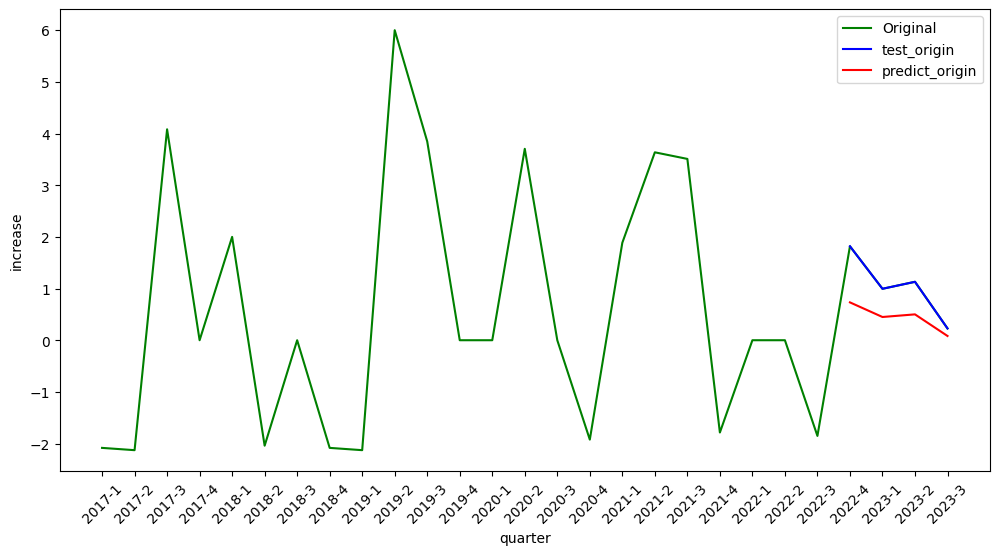

In [682]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [683]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.601903
std      0.385634
min      0.145732
25%      0.445853
50%      0.588066
75%      0.744117
max      1.085750
dtype: float64

In [684]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 25ms/step
[[0.27992404]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : 0.1474676877260208 


### 추가

In [685]:
sin_pills.loc[27] = ['2023-4', '한식음식점', sales, growth, increase, marketability]

<ipython-input-685-cee5d100b8d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_pills.loc[27] = ['2023-4', '한식음식점', sales, growth, increase, marketability]


In [686]:
final_sin_pills = sin_pills
final_sin_pills

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,의약품,1.465109e+10,1.000000,-2.083333,8.776581e+07
1,2017-2,의약품,1.487897e+10,1.015554,-2.127660,8.828899e+07
2,2017-3,의약품,1.538836e+10,1.034235,4.081633,9.772411e+07
3,2017-4,의약품,1.447752e+10,0.940810,0.000000,8.854231e+07
4,2018-1,의약품,1.552629e+10,1.072441,2.000000,9.435408e+07
5,2018-2,의약품,1.547680e+10,0.996813,-2.040816,9.893250e+07
6,2018-3,의약품,1.549926e+10,1.001451,0.000000,1.026495e+08
7,2018-4,의약품,1.626261e+10,1.049251,-2.083333,1.107373e+08
8,2019-1,의약품,1.973360e+10,1.213434,-2.127660,1.934281e+08
9,2019-2,의약품,2.020761e+10,1.024020,6.000000,1.809292e+08


## 최종결과

In [687]:
### X / y 데이터 생성
X = sin_pills[['성장성', '시장성', '순점포증감률']]
y = sin_pills.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000  8.776581e+07 -2.083333
1   1.015554  8.828899e+07 -2.127660
2   1.034235  9.772411e+07  4.081633
3   0.940810  8.854231e+07  0.000000
4   1.072441  9.435408e+07  2.000000
5   0.996813  9.893250e+07 -2.040816
6   1.001451  1.026495e+08  0.000000
7   1.049251  1.107373e+08 -2.083333
8   1.213434  1.934281e+08 -2.127660
9   1.024020  1.809292e+08  6.000000
10  0.923117  1.324538e+08  3.846154
11  1.173364  1.651199e+08  0.000000
12  1.017588  1.467750e+08  0.000000
13  0.990716  1.141362e+08  3.703704
14  0.938219  1.211135e+08  0.000000
15  1.070265  1.614356e+08 -1.923077
16  0.941047  1.476332e+08  1.886792
17  1.092118  1.527944e+08  3.636364
18  1.000494  1.386036e+08  3.508772
19  1.036539  1.424713e+08 -1.785714
20  0.999961  1.223943e+08  0.000000
21  1.039979  1.649853e+08  0.000000
22  1.001893  1.130446e+08 -1.851852
23  0.984404  1.610437e+08  1.818182
24  1.003782  1.357973e+08  0.995484
25  1.008856  1.345094e+08  1.130593
2

In [688]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [689]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.28261056 0.43008496 0.28983787]
 [0.26696522 0.41513355 0.27992403]]


In [690]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [691]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 2, 64)             17408     
                                                                 
 lstm_101 (LSTM)             (None, 32)                12416     
                                                                 
 dense_50 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [692]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=100,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2441
Epoch 1: val_loss improved from inf to 0.78937, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2441 - val_loss: 0.7894
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2352
Epoch 2: val_loss improved from 0.78937 to 0.77102, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.2352 - val_loss: 0.7710
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2266
Epoch 3: val_loss improved from 0.77102 to 0.75315, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2266 - val_loss: 0.7532
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2183
Epoch 4: val_loss improved from 0.75315 to 0.73569, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2183 - val_loss: 0.7357
Epoch 5/100
1/1 [=================

In [693]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.4174254 ]
 [0.5463427 ]
 [0.49579608]
 [0.48702958]]


In [694]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = sin_pills.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.331480,0.417425
2023-2,0.487065,0.546343
2023-3,0.476915,0.495796
2023-4,0.468644,0.487030


In [695]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = sin_pills.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 sin_pills의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.331480,0.417425,1.783471e+10,1.870516e+10,-870447104.0
2023-2,0.487065,0.546343,1.941046e+10,2.001082e+10,-600352768.0
2023-3,0.476915,0.495796,1.930767e+10,1.949889e+10,-191223808.0
2023-4,0.468644,0.487030,1.922389e+10,1.941010e+10,-186208256.0


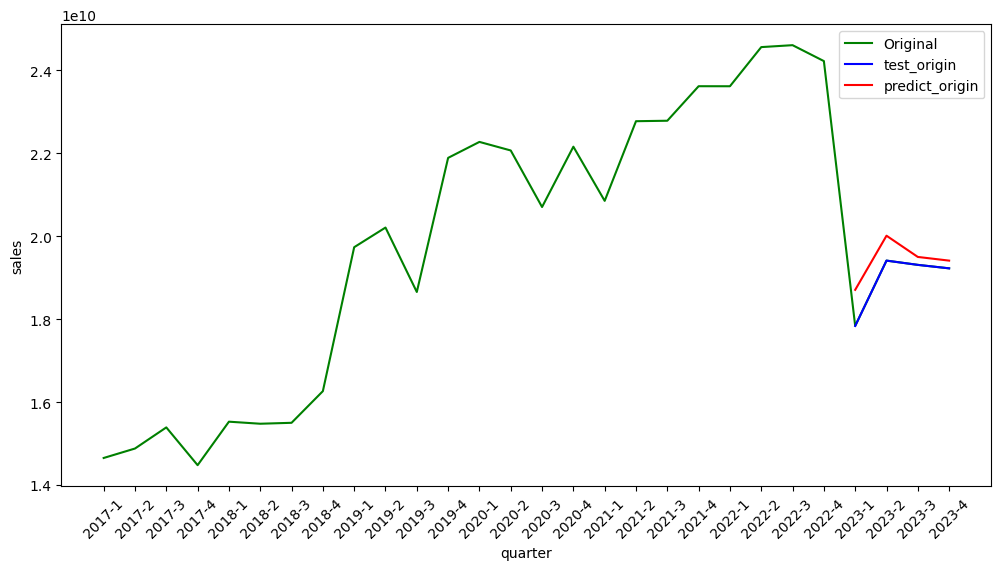

In [696]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sin_pills['분기'], sin_pills['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()